# Medical No Show Data
## Description
This notebook uses raw medical no-show data and creates clean files for analysis

### Import Dependencies

In [3]:
import pandas as pd
import numpy as np
import os
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import calendar

### Import Raw file. Assess initial data and clean.

In [4]:
# Import data from csv. Create dataframe.
noshow_df = pd.read_csv('../data/rawData/Brasil_medical_noshow_V2-May-2016.csv', encoding = 'utf-8')

# find raw data count
raw_count = len(noshow_df) #110,527 rows total

# preview the raw data
noshow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Rename columns for clarity
noshow_df.rename(columns = {'PatientId':'PatientID',
                            'Neighbourhood':'Neighborhood',
                            'Scholarship':'Welfare_Assistance',
                            'Hipertension':'Hypertension',
                            'Handcap':'Handicap'}, inplace = True)

noshow_df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Welfare_Assistance,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# It looks like Appointment Days were booked without any time information. Thus, we only need the dates themselves, we can strip out the timestamp info
noshow_df['AppointmentDay'].astype(str)
noshow_df['ScheduledDay'].astype(str)

noshow_df['AppointmentDay'] = noshow_df['AppointmentDay'].str[:10]
noshow_df['ScheduledDay'] = noshow_df['ScheduledDay'].str[:10]

noshow_df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Welfare_Assistance,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# Create Appointment Day of Week column
def findWeekday(date): 
    weekday = datetime.datetime.strptime(date, '%Y-%m-%d').weekday() 
    return (calendar.day_name[weekday]) 

noshow_df['AppointmentDayofWeek'] = noshow_df.AppointmentDay.apply(findWeekday)

noshow_df

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Welfare_Assistance,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,AppointmentDayofWeek
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,Friday
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Friday
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Friday
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,Friday
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,Friday


In [8]:
#Check out unique values in attributes to get a better understanding of data and check for typos

# Print Unique Values
print("Unique Values in Age => {}".format(noshow_df.Age.unique())) # There is a negative age value. Need to remove
print("Unique Values in Gender => {}".format(noshow_df.Gender.unique()))
print("Unique Values in Welfare_Assistance => {}".format(noshow_df.Welfare_Assistance.unique()))
print("Unique Values in Hypertension => {}".format(noshow_df.Hypertension.unique()))
print("Unique Values in Diabetes => {}".format(noshow_df.Diabetes.unique()))
print("Unique Values in Alcoholism => {}".format(noshow_df.Alcoholism.unique()))
print("Unique Values in Handicap => {}".format(noshow_df.Handicap.unique())) # Looks like Handicap is categorized by severity. 1-4 indicate levels of severity
print("Unique Values in SMS_received => {}".format(noshow_df.SMS_received.unique()))
print("Appointment Day of Week => {}".format(noshow_df.AppointmentDayofWeek.unique())) # No Sunday appointments.

Unique Values in Age => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
Unique Values in Gender => ['F' 'M']
Unique Values in Welfare_Assistance => [0 1]
Unique Values in Hypertension => [1 0]
Unique Values in Diabetes => [0 1]
Unique Values in Alcoholism => [0 1]
Unique Values in Handicap => [0 1 2 3 4]
Unique Values in SMS_received => [0 1]
Appointment Day of Week => ['Friday' 'Tuesday' 'Monday' 'Wednesday' 'Thursday' 'Saturday']


In [9]:
# Check datatypes and verify if there are any nulls

noshow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientID               110527 non-null float64
AppointmentID           110527 non-null int64
Gender                  110527 non-null object
ScheduledDay            110527 non-null object
AppointmentDay          110527 non-null object
Age                     110527 non-null int64
Neighborhood            110527 non-null object
Welfare_Assistance      110527 non-null int64
Hypertension            110527 non-null int64
Diabetes                110527 non-null int64
Alcoholism              110527 non-null int64
Handicap                110527 non-null int64
SMS_received            110527 non-null int64
No-show                 110527 non-null object
AppointmentDayofWeek    110527 non-null object
dtypes: float64(1), int64(8), object(6)
memory usage: 12.6+ MB


In [10]:
# Clean up datatypes

# Convert PatientID and to integers
noshow_df['PatientID'] = noshow_df['PatientID'].astype('int64')

# Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime64[ns]'
noshow_df['ScheduledDay'] = pd.to_datetime(noshow_df['ScheduledDay']).dt.date.astype('datetime64[ns]')
noshow_df['AppointmentDay'] = pd.to_datetime(noshow_df['AppointmentDay']).dt.date.astype('datetime64[ns]')

noshow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientID               110527 non-null int64
AppointmentID           110527 non-null int64
Gender                  110527 non-null object
ScheduledDay            110527 non-null datetime64[ns]
AppointmentDay          110527 non-null datetime64[ns]
Age                     110527 non-null int64
Neighborhood            110527 non-null object
Welfare_Assistance      110527 non-null int64
Hypertension            110527 non-null int64
Diabetes                110527 non-null int64
Alcoholism              110527 non-null int64
Handicap                110527 non-null int64
SMS_received            110527 non-null int64
No-show                 110527 non-null object
AppointmentDayofWeek    110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(4)
memory usage: 12.6+ MB


In [11]:
# Find the number Days Booked in Advance for appointment
noshow_df['AdvanceBookingDays'] = noshow_df['AppointmentDay'] - noshow_df['ScheduledDay']
noshow_df['AdvanceBookingDays'] = noshow_df['AdvanceBookingDays'] / np.timedelta64(1, 'D')
noshow_df['AdvanceBookingDays'] = noshow_df['AdvanceBookingDays'].astype('int64')

noshow_df.head(10)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Welfare_Assistance,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,AppointmentDayofWeek,AdvanceBookingDays
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,0
5,95985133231274,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,Friday,2
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Friday,2
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Friday,2
8,56394729949972,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,Friday,0
9,78124564369297,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,Friday,2


In [12]:
#Remove negative info in Age column 
noshow_df = noshow_df.loc[noshow_df['Age']>=0]

print("Unique Values in Age => {}".format(noshow_df.Age.unique()))

Unique Values in Age => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99]


In [14]:
#Remove negative values in AdvanceBookingDays info
noshow_df = noshow_df.loc[noshow_df['AdvanceBookingDays']>=0]

print("Unique Values in Age => {}".format(noshow_df.AdvanceBookingDays.unique()))

Unique Values in Age => [  0   2   3   1   4   9  29  10  23  11  18  17  14  28  24  21  15  16
  22  43  30  31  42  32  56  45  46  39  37  38  44  50  60  52  53  65
  67  91  66  84  78  87 115 109  63  70  72  57  58  51  59  41  49  73
  64  20  33  34   6  35  36  12  13  40  47   8   5   7  25  26  48  27
  19  61  55  62 176  54  77  69  83  76  89  81 103  79  68  75  85 112
  80  86  98  94 142 155 162 169 104 133 125  96  88  90 151 126 127 111
 119  74  71  82 108 110 102 122 101 105  92  97  93 107  95 139 132 179
 117 146 123]


### Delving into Advance Booking Days
Find a way to bin the days booked in advance data to be more meaningful

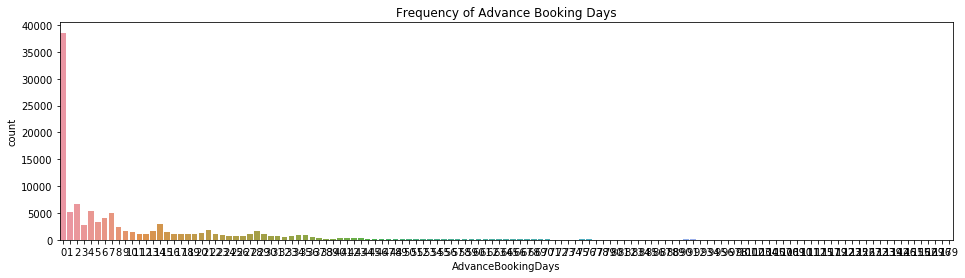

In [15]:
plt.figure(figsize=(16,4))
bookingdaysplot = sns.countplot(x=noshow_df['AdvanceBookingDays'])
bookingdaysplot.set_title("Frequency of Advance Booking Days")
plt.show()

It looks like the vast majority of bookings were same-day appointments.

In [16]:
# Check out frequency of each days appointments were booked in advance
advancebookingdays_df = pd.DataFrame(noshow_df['AdvanceBookingDays'].value_counts().reset_index())

advancebookingdays_df.rename(columns = {'index':'AdvanceBookingDays',
                                'AdvanceBookingDays':'Frequency_Count'}, inplace = True)

total = len(noshow_df)

advancebookingdays_df['Percentage'] = advancebookingdays_df.groupby('AdvanceBookingDays')['Frequency_Count'].apply(lambda x: 100 * x/total)


advancebookingdays_df.head()

,AdvanceBookingDays,Frequency_Count,Percentage
0,0,38562,34.891107
1,2,6725,6.084816
2,4,5290,4.786421
3,1,5213,4.716751
4,7,4906,4.438975


In [17]:
noshow_df['AdvanceBookingDays'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: AdvanceBookingDays, dtype: float64

It looks like 75% of appointments were booked within a 2 week period of the appointment date.

In [18]:
# Label whether appointments were booked on the same day
appointment_type = []

for i in range(len(noshow_df)):
        if (noshow_df['AdvanceBookingDays'][i] > 0 ):
            appointment_type.append(0)
            
        else: 
            appointment_type.append(1)

noshow_df['SameDayAppt'] = pd.DataFrame({'SameDayAppt': appointment_type})
noshow_df.head()

KeyError: 27033

In [19]:
# Save file to csv 
noshow_df.to_csv('../data/cleanData/appointments.csv', index = False, header=True, encoding = 'utf-8')


### What about repeat patients? 
Time to dig deeper. Which patients have visited more than once? How frequently do most patients visit? 

In [17]:
# Count number of visits per patient
patient_visits_df = pd.DataFrame(noshow_df['PatientID'].value_counts().reset_index())

patient_visits_df.rename(columns = {'index':'PatientID',
                                'PatientID':'Visit_Count'}, inplace = True)

patient_visits_df.head()

,PatientID,Visit_Count
0,822145925426128,88
1,99637671331,84
2,26886125921145,70
3,33534783483176,65
4,871374938638855,62


In [19]:
# Label whether patients are repeats or not

# Filter to patients that showed up
repeat_patient = []

for i in range(len(patient_visits_df)):
        if (patient_visits_df['Visit_Count'][i] > 1 ):
            repeat_patient.append(1)
            
        else: 
            repeat_patient.append(0)

patient_visits_df['Repeat_Patient'] = pd.DataFrame({'Repeat_Patient': repeat_patient})
patient_visits_df.head()

,PatientID,Visit_Count,Repeat_Patient
0,822145925426128,88,1
1,99637671331,84,1
2,26886125921145,70,1
3,33534783483176,65,1
4,871374938638855,62,1


In [20]:
# Save file to csv 
patient_visits_df.to_csv('../data/cleanData/patient_visits.csv', index = False, header=True)